In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os
from datetime import datetime
import darts as dt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
from l0bnb import fit_path

# Loading the dataset

In [ ]:
ticker = yf.Ticker(ticker='AAPL').history('1y')

$AAPL: possibly delisted; no price data found  (period=1y)


In [ ]:
filepath = "/Users/mudit.000/OneDrive - University of Essex/Documents/GitHub/Personal-Research-Learning/Personal-Research-Learning/NSE-Stock-Historical-Data/v1"

In [ ]:
dp = pl.read_csv(filepath + "/3IINFOLTD.NS.csv")

In [ ]:
stocklist = []
stocknames = []

In [ ]:
for files in os.listdir(filepath):
    stocknames.append(files)
    stocklist.append(pl.read_csv(filepath + "/" + files))

In [ ]:
stocknames = pl.Series(stocknames)

In [ ]:
stocknames = stocknames.str.replace(".NS.csv", "")

In [ ]:
temp = []
for x in stocklist:
    temp.append(x.with_columns(pl.col('Date').str.slice(0,10).alias('Date')))

stocklist = temp

In [ ]:
temp = pl.DataFrame()
i = 0
for x in stocklist:
    try:
        temp = temp.vstack(x)
        i += 1
    except:
        print(i)
        break

25


In [ ]:
temp = []
for x in stocklist:
    temp.append(pl.Series(np.log(x["Close"] ) - np.log(x["Open"])))
logstock = temp

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\polars\series\series.py:1458: RuntimeWarning: invalid value encountered in log
  lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs),
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\polars\series\series.py:1458: RuntimeWarning: divide by zero encountered in log
  lambda out: ufunc(*args, out=out, dtype=dtype_char, **kwargs),


In [ ]:
stocklist[1]

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
str,f64,f64,f64,f64,i64,f64,f64
"""2018-01-11""",31.14629,31.14629,31.14629,31.14629,157,0.0,0.0
"""2018-01-12""",31.752428,31.752428,31.752428,31.752428,360,0.0,0.0
"""2018-01-15""",32.35857,32.35857,32.35857,32.35857,795,0.0,0.0
"""2018-01-16""",32.964706,32.964706,32.964706,32.964706,2735,0.0,0.0
"""2018-01-17""",33.617474,33.617474,33.011335,33.617474,56033,0.0,0.0
…,…,…,…,…,…,…,…
"""2023-10-26""",18.299999,18.75,18.200001,18.5,6333,0.0,0.0
"""2023-10-27""",18.5,18.5,18.15,18.299999,1101,0.0,0.0
"""2023-10-30""",18.200001,18.5,18.15,18.25,2663,0.0,0.0


In [ ]:
temp = []
for i in zip(range(len(stocklist)),stocknames):
    temp2 = stocklist[i[0]].hstack([logstock[i[0]].alias(i[1])])
    temp.append(temp2)
stocklist = temp

In [ ]:
temp = []
for i in range(len(stocklist)):
    temp.append(stocklist[i].with_columns(pl.col("Date").str.strptime(dtype = pl.Date, format = "%Y-%m-%d").alias("Date")))
stocklist = temp

In [ ]:
temp = []
for i in range(len(stocklist)):
    temp2 = stocklist[i].filter(pl.col("Date") > pl.date(2022,1,1))
    temp2 = temp2.filter(pl.col("Date") < pl.date(2022,12,31))
    temp2 = temp2.sort(pl.col("Date"))
    temp.append(temp2)
projlist = temp

In [ ]:
temp = []
for x in projlist:
    temp.append(x.drop(["Open", "High", "Low", "Close","Volume", "Dividends", "Stock Splits"]))
maslist = temp

In [ ]:
pl.DataFrame({stocknames[0]:np.log(projlist[0]['Close'])-np.log(projlist[0]['Open'])})

20MICRONS
f64
-0.029356
-0.034835
-0.009065
0.031074
0.170844
…
0.045342
0.003974
0.008406


In [ ]:
dictdf = {stocknames[i]:np.log(projlist[i]['Close'])-np.log(projlist[i]['Open']) for i in range(0,len(stocknames))}

In [ ]:
listkeys=list()
lenkeys=list()
for key in dictdf:
    lenkeys.append(dictdf[key])
    if len(dictdf[key]) < 248:
        listkeys.append(key)


In [ ]:
listkeys

['AARTIPHARM',
 'ACI',
 'AETHER',
 'AGSTRA',
 'AHL',
 'AKSHAR',
 'ANDHRACEMT',
 'ARTEMISMED',
 'AVONMORE',
 'AWL',
 'AXITA',
 'BAIDFIN',
 'BIKAJI',
 'CAMPUS',
 'CHEVIOT',
 'CHOICEIN',
 'CMMIPL',
 'CSLFINANCE',
 'DBOL',
 'DCXINDIA',
 'DELHIVERY',
 'DHARMAJ',
 'DIGJAMLMTD',
 'DIVGIITTS',
 'DJML',
 'DREAMFOLKS',
 'DYCL',
 'ELDEHSG',
 'ELIN',
 'EMAMIPAP',
 'EMIL',
 'EMUDHRA',
 'ETHOSLTD',
 'FAZE3Q',
 'FIBERWEB',
 'FIVESTAR',
 'FUSION',
 'GATEWAY',
 'GMRP_AND_UI',
 'GOLDSTAR',
 'GOYALALUM',
 'GRMOVER',
 'GRWRHITECH',
 'GSLSU',
 'GUJRAFFIA',
 'HARDWYN',
 'HARIOMPIPE',
 'HARSHA',
 'HYBRIDFIN',
 'IEL',
 'INDOAMIN',
 'INDOBORAX',
 'INNOVATIVE',
 'INOXGREEN',
 'IONEXCHANG',
 'JAIPURKURT',
 'JALAN',
 'KAMOPAINTS',
 'KAYNES',
 'KFINTECH',
 'KRITINUT',
 'KSHITIJPOL',
 'LANDMARK',
 'LICI',
 'LOYALTEX',
 'MAHICKRA',
 'MALLCOM',
 'MANOMAY',
 'MANORAMA',
 'MANYAVAR',
 'MEDANTA',
 'MEDICO',
 'MEGASTAR',
 'MHLXMIRU',
 'MONARCH',
 'MSUMI',
 'NGLFINE',
 'NINSYS',
 'NRL',
 'NSLNISP',
 'OBCL',
 'PARADEEP',
 

In [ ]:
temp = dictdf.copy()

In [ ]:
for i in listkeys:
    if(len(temp[i]) < 248 or len(temp[i]) > 248):
        temp.pop(i)

In [ ]:
tempkeys = temp.keys()

In [ ]:
temp

{'20MICRONS': shape: (248,)
 Series: 'Close' [f64]
 [
 	-0.029356
 	-0.034835
 	-0.009065
 	0.031074
 	0.170844
 	…
 	0.045342
 	0.003974
 	0.008406
 	0.031784
 	-0.004384
 ],
 '21STCENMGM': shape: (248,)
 Series: 'Close' [f64]
 [
 	-0.002139
 	-0.00421
 	-0.032721
 	-0.016
 	0.026811
 	…
 	-0.006689
 	0.0
 	-0.017739
 	-0.024527
 	0.024693
 ],
 '360ONE': shape: (248,)
 Series: 'Close' [f64]
 [
 	0.027456
 	0.010456
 	0.023895
 	-0.00929
 	0.012645
 	…
 	0.015773
 	0.000369
 	-0.001624
 	0.001765
 	0.011123
 ],
 '3IINFOLTD': shape: (248,)
 Series: 'Close' [f64]
 [
 	-0.012237
 	0.006501
 	-0.01688
 	0.009495
 	0.017612
 	…
 	0.029061
 	-0.003711
 	-0.002463
 	-0.003706
 	-0.006116
 ],
 '3MINDIA': shape: (248,)
 Series: 'Close' [f64]
 [
 	0.013629
 	-0.003451
 	-0.003295
 	0.00203
 	0.007636
 	…
 	0.005905
 	-0.003484
 	-0.016959
 	-0.007813
 	-0.005995
 ],
 '3PLAND': shape: (248,)
 Series: 'Close' [f64]
 [
 	0.0
 	0.005305
 	0.0
 	0.0
 	0.0
 	…
 	0.090545
 	-0.023393
 	0.0
 	0.043803
 

In [ ]:
# for i in tempkeys:
#     if(len(temp[i]) != 248):
#         temp.pop(i, None)
#         

In [ ]:
newlistkeys = dictdf.keys()

In [ ]:
newlistkeys

dict_keys(['20MICRONS', '21STCENMGM', '360ONE', '3IINFOLTD', '3MINDIA', '3PLAND', '3RDROCK', '5PAISA', '63MOONS', 'A2ZINFRA', 'AAATECH', 'AAKASH', 'AAREYDRUGS', 'AARON', 'AARTIDRUGS', 'AARTIIND', 'AARTIPHARM', 'AARTISURF', 'AARVEEDEN', 'AARVI', 'AAVAS', 'ABAN', 'ABB', 'ABCAPITAL', 'ABFRL', 'ABHISHEK', 'ABMINTLLTD', 'ABSLAMC', 'ACC', 'ACCELYA', 'ACCURACY', 'ACE', 'ACEINTEG', 'ACI', 'ADANIENT', 'ADANIGREEN', 'ADANIPORTS', 'ADANIPOWER', 'ADFFOODS', 'ADL', 'ADORWELD', 'ADROITINFO', 'ADSL', 'ADVANIHOTR', 'ADVENZYMES', 'AEGISCHEM', 'AETHER', 'AFFLE', 'AGARIND', 'AGI', 'AGRITECH', 'AGROPHOS', 'AGSTRA', 'AHL', 'AHLADA', 'AHLEAST', 'AHLUCONT', 'AHLWEST', 'AIAENG', 'AIFL', 'AIRAN', 'AIROLAM', 'AJANTPHARM', 'AJMERA', 'AJOONI', 'AJRINFRA', 'AKASH', 'AKG', 'AKSHAR', 'AKSHARCHEM', 'AKSHOPTFBR', 'AKZOINDIA', 'ALANKIT', 'ALBERTDAVD', 'ALCHEM', 'ALEMBICLTD', 'ALICON', 'ALKALI', 'ALKEM', 'ALKYLAMINE', 'ALLCARGO', 'ALLSEC', 'ALOKINDS', 'ALPA', 'ALPHAGEO', 'ALPSINDUS', 'AMARAJABAT', 'AMBER', 'AMBICAAGAR',

In [ ]:
for i in newlistkeys:
    if(len(dictdf[i]) == 248):
        print(i)

20MICRONS
21STCENMGM
360ONE
3IINFOLTD
3MINDIA
3PLAND
3RDROCK
5PAISA
63MOONS
A2ZINFRA
AAATECH
AAKASH
AAREYDRUGS
AARON
AARTIDRUGS
AARTIIND
AARTISURF
AARVEEDEN
AARVI
AAVAS
ABAN
ABB
ABCAPITAL
ABFRL
ABMINTLLTD
ABSLAMC
ACC
ACCELYA
ACCURACY
ACE
ACEINTEG
ADANIENT
ADANIGREEN
ADANIPORTS
ADANIPOWER
ADFFOODS
ADL
ADORWELD
ADROITINFO
ADSL
ADVANIHOTR
ADVENZYMES
AEGISCHEM
AFFLE
AGARIND
AGI
AGRITECH
AGROPHOS
AHLADA
AHLEAST
AHLUCONT
AHLWEST
AIAENG
AIFL
AIRAN
AIROLAM
AJANTPHARM
AJMERA
AJOONI
AJRINFRA
AKASH
AKG
AKSHARCHEM
AKSHOPTFBR
AKZOINDIA
ALANKIT
ALBERTDAVD
ALCHEM
ALEMBICLTD
ALICON
ALKALI
ALKEM
ALKYLAMINE
ALLCARGO
ALLSEC
ALOKINDS
ALPA
ALPHAGEO
ALPSINDUS
AMARAJABAT
AMBER
AMBICAAGAR
AMBIKCO
AMBUJACEM
AMDIND
AMIORG
AMJLAND
AMRUTANJAN
ANANDRATHI
ANANTRAJ
ANDHRAPAP
ANDHRSUGAR
ANGELONE
ANIKINDS
ANKITMETAL
ANMOL
ANSALAPI
ANTGRAPHIC
ANUP
ANURAS
APARINDS
APCL
APCOTEXIND
APEX
APLAPOLLO
APLLTD
APOLLO
APOLLOHOSP
APOLLOPIPE
APOLLOTYRE
APOLSINHOT
APTECHT
APTUS
ARCHIDPLY
ARCHIES
ARCOTECH
ARENTERP
ARIES
ARIHANTCAP
AR

In [ ]:
# pDF = pl.DataFrame(dictdf)

# LASSO Model Building

## Loading Dataset

In [ ]:
Hitters = pd.read_csv('asx99.csv')
np.isnan(Hitters).sum()

Date    0
ABC     0
AGL     0
AIO     0
ALL     0
       ..
WBC     0
WES     0
WFD     0
WOW     0
WPL     0
Length: 100, dtype: int64

In [ ]:
Hitters = Hitters.dropna ();
Hitters.shape
Hitters = Hitters.drop("Date", axis = 1)

In [ ]:
def nCp(sigma2 , estimator , X, Y):
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [ ]:
design = MS(Hitters.columns.drop('ABC')).fit(Hitters)
Y = np.array(Hitters['ABC'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale

In [ ]:
design

ModelSpec(terms=Index(['AGL', 'AIO', 'ALL', 'ALQ', 'AMC', 'AMP', 'ANN', 'ANZ', 'APA', 'AST',
       'ASX', 'AWC', 'AZJ', 'BEN', 'BHP', 'BLD', 'BOQ', 'BSL', 'BXB', 'CAR',
       'CBA', 'CCL', 'CGF', 'CIM', 'COH', 'CPU', 'CSL', 'CSR', 'CTX', 'CWN',
       'DLX', 'DMP', 'DOW', 'DUE', 'DXS', 'FLT', 'FMG', 'FXJ', 'GMG', 'GNC',
       'GPT', 'HGG', 'HSO', 'HVN', 'IAG', 'IFL', 'ILU', 'IOF', 'IPL', 'JBH',
       'JHX', 'LLC', 'MFG', 'MGR', 'MPL', 'MQG', 'NAB', 'NCM', 'NVT', 'ORA',
       'ORG', 'ORI', 'OSH', 'PPT', 'PRY', 'QAN', 'QBE', 'QUB', 'REA', 'REC',
       'RHC', 'RIO', 'RMD', 'S32', 'SCG', 'SEK', 'SGP', 'SGR', 'SHL', 'SKI',
       'SPO', 'SRX', 'STO', 'SUN', 'SYD', 'TAH', 'TCL', 'TLS', 'TPM', 'TTS',
       'TWE', 'VCX', 'VOC', 'WBC', 'WES', 'WFD', 'WOW', 'WPL'],
      dtype='object'))

In [ ]:
neg_Cp = partial(nCp , sigma2)

In [ ]:
strategy = Stepwise.first_peak(design ,
direction='forward',
max_terms=len(design.terms))

In [ ]:
hitters_MSE = sklearn_selected(OLS ,
strategy)
hitters_MSE.fit(Hitters , Y)
hitters_MSE.selected_state_

('AGL',
 'AIO',
 'ALL',
 'ALQ',
 'AMC',
 'AMP',
 'ANN',
 'ANZ',
 'APA',
 'AST',
 'ASX',
 'AWC',
 'AZJ',
 'BEN',
 'BHP',
 'BLD',
 'BOQ',
 'BSL',
 'BXB',
 'CAR',
 'CBA',
 'CCL',
 'CGF',
 'CIM',
 'COH',
 'CPU',
 'CSL',
 'CSR',
 'CTX',
 'CWN',
 'DLX',
 'DMP',
 'DOW',
 'DUE',
 'DXS',
 'FLT',
 'FMG',
 'FXJ',
 'GMG',
 'GNC',
 'GPT',
 'HGG',
 'HSO',
 'HVN',
 'IAG',
 'IFL',
 'ILU',
 'IOF',
 'IPL',
 'JBH',
 'JHX',
 'LLC',
 'MFG',
 'MGR',
 'MPL',
 'MQG',
 'NAB',
 'NCM',
 'NVT',
 'ORA',
 'ORG',
 'ORI',
 'OSH',
 'PPT',
 'PRY',
 'QAN',
 'QBE',
 'QUB',
 'REA',
 'REC',
 'RHC',
 'RIO',
 'RMD',
 'S32',
 'SCG',
 'SEK',
 'SGP',
 'SGR',
 'SHL',
 'SKI',
 'SPO',
 'SRX',
 'STO',
 'SUN',
 'SYD',
 'TAH',
 'TCL',
 'TLS',
 'TPM',
 'TTS',
 'TWE',
 'VCX',
 'VOC',
 'WBC',
 'WES',
 'WFD',
 'WOW',
 'WPL')

In [ ]:
hitters_Cp = sklearn_selected(OLS ,
strategy ,
scoring=neg_Cp)
hitters_Cp.fit(Hitters , Y)
hitters_Cp.selected_state_

('AIO',
 'ALQ',
 'ANN',
 'BLD',
 'BXB',
 'CAR',
 'CBA',
 'COH',
 'CPU',
 'CSR',
 'GNC',
 'HGG',
 'HVN',
 'JHX',
 'MFG',
 'QAN',
 'REA',
 'RHC',
 'RMD',
 'SCG',
 'TAH',
 'TPM')

In [ ]:
hitters_Cp

sklearn_selected(model_type=<class 'statsmodels.regression.linear_model.OLS'>,
                 scoring=functools.partial(<function nCp at 0x000001B19D4EB600>, 0.00011803165858740648),
                 strategy=Strategy(initial_state=(), candidate_states=<bound method Stepwise.candidate_states of <ISLP.models.strategy.Stepwise object at 0x000001B1B91FB950>>, build_submodel=<bound method ModelSpec.bu...
       'ORG', 'ORI', 'OSH', 'PPT', 'PRY', 'QAN', 'QBE', 'QUB', 'REA', 'REC',
       'RHC', 'RIO', 'RMD', 'S32', 'SCG', 'SEK', 'SGP', 'SGR', 'SHL', 'SKI',
       'SPO', 'SRX', 'STO', 'SUN', 'SYD', 'TAH', 'TCL', 'TLS', 'TPM', 'TTS',
       'TWE', 'VCX', 'VOC', 'WBC', 'WES', 'WFD', 'WOW', 'WPL'],
      dtype='object'))>, check_finished=<function first_peak at 0x000001B1B7313CE0>, postprocess=<function _postprocess_best at 0x000001B1B7313F60>))

In [ ]:
strategy = Stepwise.fixed_steps(design ,
len(design.terms),
direction='forward')
full_path = sklearn_selection_path(OLS , strategy)

In [ ]:
full_path.fit(Hitters , Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape

(253, 99)

(0.0, 2000.0)

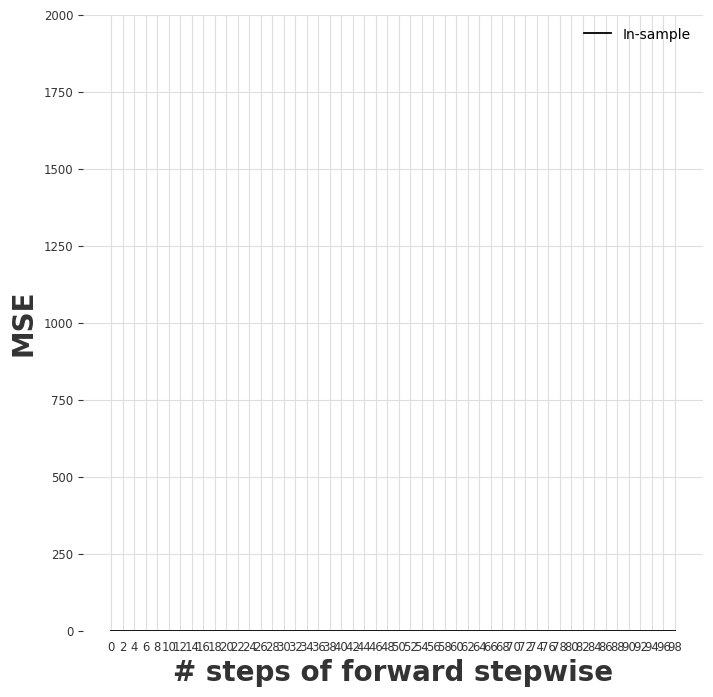

In [ ]:
# here
mse_fig , ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
insample_mse ,
'k', # color black
label='In-sample')
ax.set_ylabel('MSE',
fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim ([0 ,2000])

In [ ]:
K = 5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path ,
Hitters ,
Y,
cv=kfold)
Yhat_cv.shape


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 99 and the array at index 4 has size 58

In [ ]:
cv_mse = []
for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx ,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape

(99, 5)

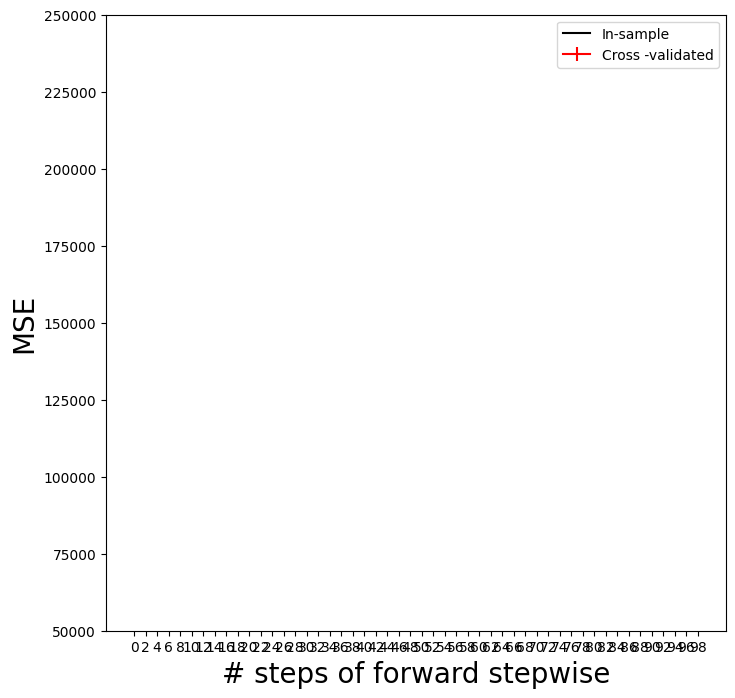

In [ ]:
ax.errorbar(np.arange(n_steps),
cv_mse.mean(1),
cv_mse.std(1) / np.sqrt(K),
label='Cross -validated',
c='r') # color red
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

In [ ]:
validation = skm.ShuffleSplit(n_splits=1,
test_size=0.2,
random_state=0)
for train_idx , test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
    Y[train_idx])
    Yhat_val = full_path.predict(Hitters.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx ,None])**2
    validation_mse = errors.mean(0)

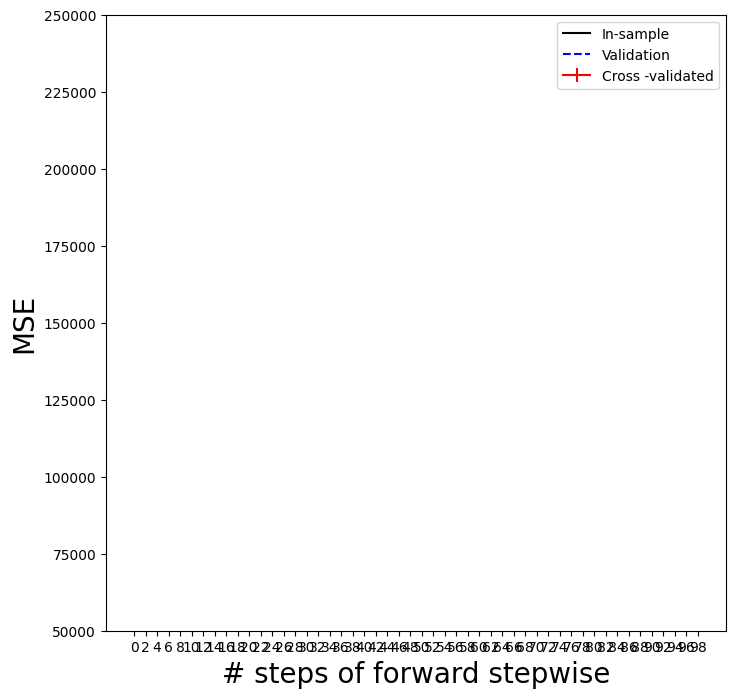

In [ ]:
ax.plot(np.arange(n_steps),
    validation_mse ,
    'b--', # color blue, broken line
    label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim ([50000 ,250000])
ax.legend()
mse_fig

In [ ]:
D = design.fit_transform(Hitters)

In [ ]:
D

,intercept,Date,AGL,AIO,ALL,ALQ,AMC,AMP,ANN,ANZ,...,TPM,TTS,TWE,VCX,VOC,WBC,WES,WFD,WOW,WPL
0,1.0,20150105,0.012542,-0.003295,0.004563,0.000000,0.001472,0.001797,0.002656,-0.001863,...,-0.016309,-0.002861,-0.010515,0.000000,-0.004713,-0.003312,-0.000955,0.015168,-0.012814,0.005232
1,1.0,20150106,-0.013284,-0.011618,-0.009146,-0.045462,-0.003683,-0.019946,-0.018292,-0.012197,...,-0.036534,-0.008633,-0.002116,0.000000,-0.015873,-0.008784,-0.004068,-0.005391,-0.014657,-0.050017
2,1.0,20150107,0.003708,-0.006700,-0.001533,0.019194,-0.010386,0.003656,0.005836,-0.001890,...,-0.004662,0.000000,-0.017094,0.000000,-0.012883,-0.005491,-0.006496,0.022449,0.005021,-0.008815
3,1.0,20150108,0.004431,0.010034,0.018238,-0.050693,-0.015784,-0.003656,0.004912,0.005972,...,0.010844,0.011494,-0.017392,0.000000,0.009677,0.003664,0.009130,0.018849,-0.010405,-0.004993
4,1.0,20150109,0.011722,0.014864,0.016431,0.033435,0.004535,0.019946,0.008428,0.014930,...,0.022849,0.014185,0.023836,0.000000,0.004804,0.017823,0.021532,-0.001038,0.019379,0.029861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.0,20151223,-0.002301,0.000000,0.004012,0.033523,-0.005293,0.003571,-0.010074,0.007468,...,0.004024,0.000000,-0.008647,0.010582,0.000000,0.001873,0.000745,0.002103,0.005078,0.010567
249,1.0,20151224,0.008603,-0.006842,0.004993,0.005479,0.009808,0.012401,0.008641,0.013671,...,-0.019261,0.016298,0.014779,-0.007042,0.001363,0.014861,0.009137,0.005238,0.024188,0.021159
250,1.0,20151229,0.023703,0.000000,0.016791,0.032261,0.004494,0.019181,0.016122,0.013849,...,0.020264,0.000000,-0.001223,0.003527,0.012187,0.014643,0.026681,0.009360,0.023617,0.008129
251,1.0,20151230,0.001115,0.006842,0.005859,0.020943,0.011887,0.012017,0.017716,0.011873,...,-0.003014,0.006905,0.000000,-0.003527,0.012040,0.019197,0.004537,0.004132,0.006818,0.014328


In [ ]:
D = D.drop(['intercept'], axis=1)
X = np.asarray(D)

In [ ]:
len(X[1])

98

In [ ]:
path = fit_path(X,Y,max_nonzeros=X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  4
Iteration: 4. Number of non-zeros:  9


In [ ]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555505,
 'lambda_0': 0.011416248027450187,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

In [ ]:
path[4]

{'B': array([   0.        ,    3.13128866,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.67695124,
           0.        ,    0.        , -137.72478629,    0.        ,
           0.        ,    0.        ,    0.        ]),
 'B0': 44.77699685800354,
 'lambda_0': 0.010845435626077676,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

In [ ]:
Xs = X - X.mean(0)[None ,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None ,:]
lambdas = 10**np.linspace(5, -5, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
Y,
l1_ratio=0.,
alphas=lambdas)[1]
soln_array.shape

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031182552081310815, tolerance: 6.236525149920506e-06
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: U

(98, 100)

In [ ]:
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,AGL,AIO,ALL,ALQ,AMC,AMP,ANN,ANZ,APA,AST,...,TPM,TTS,TWE,VCX,VOC,WBC,WES,WFD,WOW,WPL
negative log(lambda),,,,,,,,,,,,,,,,,,,,,
-15.669291,1.099512e-09,6.716615e-10,9.711023e-10,6.939732e-10,1.047421e-09,1.327402e-09,6.818069e-10,1.231882e-09,1.021101e-09,8.392259e-10,...,5.929390e-10,1.092543e-09,8.245693e-10,4.339716e-10,6.454024e-10,1.320676e-09,1.151003e-09,1.102346e-09,7.886026e-10,1.016394e-09
-15.436706,1.387425e-09,8.475397e-10,1.225390e-09,8.756940e-10,1.321694e-09,1.674990e-09,8.603417e-10,1.554456e-09,1.288482e-09,1.058981e-09,...,7.482029e-10,1.378631e-09,1.040487e-09,5.476093e-10,8.144042e-10,1.666502e-09,1.452399e-09,1.391001e-09,9.951021e-10,1.282543e-09
-15.204122,1.750729e-09,1.069472e-09,1.546264e-09,1.104999e-09,1.667786e-09,2.113593e-09,1.085626e-09,1.961498e-09,1.625876e-09,1.336280e-09,...,9.441231e-10,1.739632e-09,1.312943e-09,6.910032e-10,1.027660e-09,2.102883e-09,1.832717e-09,1.755241e-09,1.255674e-09,1.618382e-09
-14.971537,2.209165e-09,1.349518e-09,1.951159e-09,1.394348e-09,2.104502e-09,2.667046e-09,1.369903e-09,2.475124e-09,2.051618e-09,1.686189e-09,...,1.191345e-09,2.195162e-09,1.656742e-09,8.719451e-10,1.296756e-09,2.653531e-09,2.312621e-09,2.214857e-09,1.584477e-09,2.042162e-09
-14.738953,2.787642e-09,1.702895e-09,2.462077e-09,1.759465e-09,2.655573e-09,3.365421e-09,1.728617e-09,3.123243e-09,2.588841e-09,2.127722e-09,...,1.503302e-09,2.769972e-09,2.090565e-09,1.100267e-09,1.636316e-09,3.348367e-09,2.918189e-09,2.794825e-09,1.999377e-09,2.576909e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.426223,1.108977e-03,2.560494e-03,-4.119649e-04,4.610167e-04,1.916184e-04,-1.937657e-03,1.943632e-03,4.246423e-04,6.507844e-04,-2.141589e-03,...,-2.078432e-03,1.355828e-03,-1.856429e-04,5.499704e-04,9.952531e-04,1.168467e-04,6.592250e-04,-6.462282e-05,-1.322176e-03,5.722331e-04
6.658807,1.111451e-03,2.564365e-03,-4.121744e-04,4.591353e-04,1.935398e-04,-1.945711e-03,1.947387e-03,4.246063e-04,6.516093e-04,-2.144472e-03,...,-2.082275e-03,1.357456e-03,-1.853011e-04,5.501701e-04,9.988108e-04,1.178374e-04,6.609638e-04,-6.127459e-05,-1.324180e-03,5.745331e-04
6.891392,1.113418e-03,2.567445e-03,-4.123413e-04,4.576323e-04,1.950749e-04,-1.952144e-03,1.950379e-03,4.245743e-04,6.522662e-04,-2.146769e-03,...,-2.085337e-03,1.358747e-03,-1.850275e-04,5.503237e-04,1.001650e-03,1.186359e-04,6.623559e-04,-5.858578e-05,-1.325777e-03,5.763673e-04


Text(0, 0.5, 'Standardized coefficients')

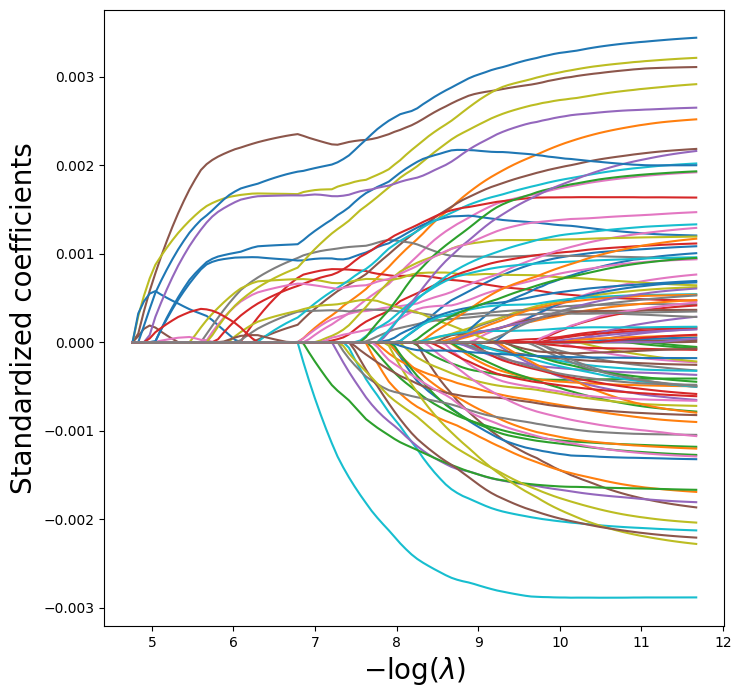

In [ ]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
#ax.legend(loc='upper left')

In [ ]:
soln_array

array([[ 1.09951241e-09,  1.38742536e-09,  1.75072914e-09, ...,
         1.11341839e-03,  1.11498140e-03,  1.11622260e-03],
       [ 6.71661475e-10,  8.47539673e-10,  1.06947221e-09, ...,
         2.56744535e-03,  2.56989460e-03,  2.57184072e-03],
       [ 9.71102273e-10,  1.22539025e-09,  1.54626418e-09, ...,
        -4.12341257e-04, -4.12473986e-04, -4.12579501e-04],
       ...,
       [ 1.10234582e-09,  1.39100068e-09,  1.75524065e-09, ...,
        -5.85857754e-05, -5.64323953e-05, -5.47115614e-05],
       [ 7.88602589e-10,  9.95102064e-10,  1.25567394e-09, ...,
        -1.32577680e-03, -1.32704679e-03, -1.32805637e-03],
       [ 1.01639442e-09,  1.28254250e-09,  1.61838225e-09, ...,
         5.76367335e-04,  5.77828234e-04,  5.78990578e-04]])

In [ ]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat

(0.0005615022764407985,
 AGL    0.000000
 AIO    0.000501
 ALL   -0.000000
 ALQ    0.000814
 AMC   -0.000000
          ...   
 WBC    0.000000
 WES    0.000000
 WFD    0.000000
 WOW   -0.000000
 WPL    0.000000
 Name: 7.48489472958064, Length: 98, dtype: float64)

In [ ]:
np.linalg.norm(beta_hat)

7.943492892752979e-05

In [ ]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)

(0.00013908840128070237, 0.00955734761225815)

In [ ]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True , with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e-02, tolerance: 6.208e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=7.006327789536935, l1_ratio=0))])

In [ ]:
np.linalg.norm(ridge.coef_)

0.0017002893571431302

In [ ]:
validation = skm.ShuffleSplit(n_splits=1,
test_size=0.5,
random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge ,
X,
Y,
scoring='neg_mean_squared_error',
cv=validation)
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e-02, tolerance: 3.523e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([0.00013883])

In [ ]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge ,
X,
Y,
scoring='neg_mean_squared_error',
cv=validation)
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e-02, tolerance: 3.523e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([0.00021302])

In [ ]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe ,
param_grid ,
cv=validation ,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.260e-03, tolerance: 3.523e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.008534335330656716, l1_ratio=0))])

In [ ]:
print(grid.best_params_['ridge__alpha'])
print(grid.best_estimator_)

0.008534335330656716
Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.008534335330656716, l1_ratio=0))])


In [ ]:
grid = skm.GridSearchCV(pipe ,
param_grid ,
cv=kfold ,
scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.521e-03, tolerance: 4.787e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.008534335330656716, l1_ratio=0))])

Text(0, 0.5, 'Cross -validated MSE')

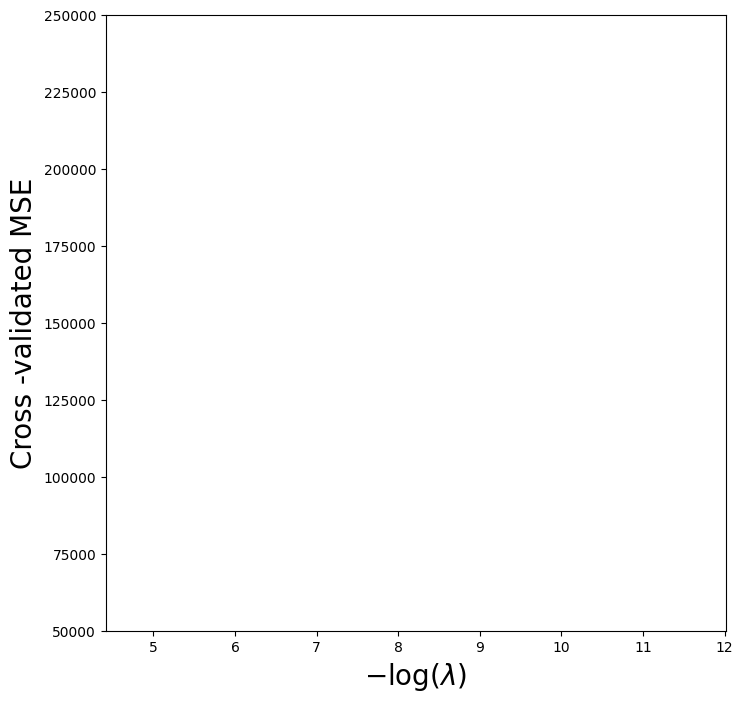

In [ ]:
ridge_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
-grid.cv_results_['mean_test_score'],
yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [ ]:
grid_r2 = skm.GridSearchCV(pipe ,
param_grid ,
cv=kfold)
grid_r2.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.521e-03, tolerance: 4.787e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisat

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([8.53433533e-03, 7.95914969e-03, 7.42272964e-03, 6.92246251e-03,
       6.45591170e-03, 6.02080486e-03, 5.61502276e-03, 5.23658902e-03,
       4.88366045e-03, 4.55451808...
       4.24755880e-05, 3.96128756e-05, 3.69431003e-05, 3.44532590e-05,
       3.21312247e-05, 2.99656877e-05, 2.79461006e-05, 2.60626270e-05,
       2.43060931e-05, 2.26679438e-05, 2.11402003e-05, 1.97154215e-05,
       1.83866681e-05, 1.71474682e-05, 1.59917862e-05, 1.49139934e-05,
       1.39088401e-05, 1.29714309e-05, 1.20971998e-05, 1.12818890e-05,
       1.05215275e-05, 9.81241175e-06, 9.15108804e-06, 8.53433533e-06])})

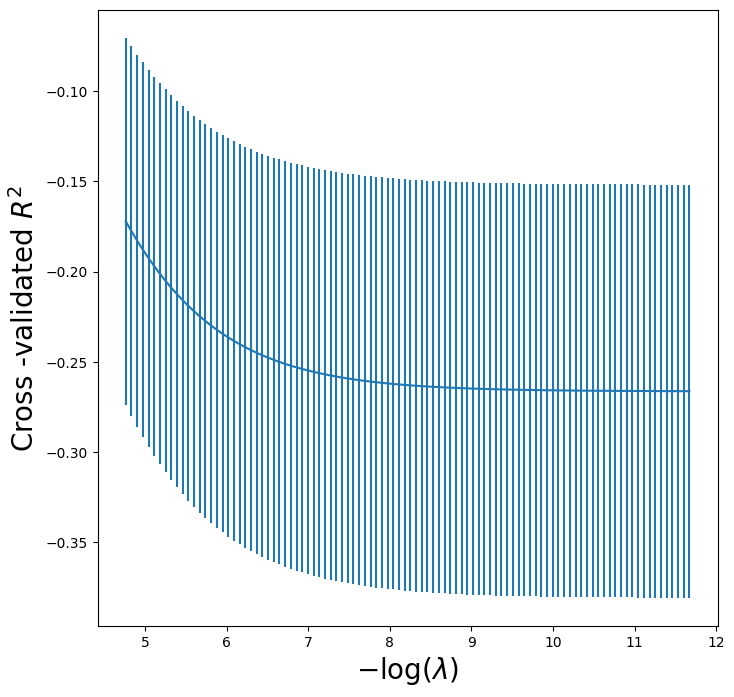

In [ ]:
r2_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated $R^2$', fontsize=20);

In [ ]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
l1_ratio=0,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),('ridge', ridgeCV)])
pipeCV.fit(X, Y)

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0055194890385465295, tolerance: 4.786501763249334e-06
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: 

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([8.53433533e-03, 7.95914969e-03, 7.42272964e-03, 6.92246251e-03,
       6.45591170e-03, 6.02080486e-03, 5.61502276e-03, 5.23658902e-03,
       4.88366045e-03, 4.55451808e-03, 4.24755880e-03, 3.96128756e-03,
       3.69431003e-03, 3.44532590e-03, 3.21312247e-03, 2.99656877e-03,
       2.79461006e-03, 2.60626270e-03,...
       3.21312247e-05, 2.99656877e-05, 2.79461006e-05, 2.60626270e-05,
       2.43060931e-05, 2.26679438e-05, 2.11402003e-05, 1.97154215e-05,
       1.83866681e-05, 1.71474682e-05, 1.59917862e-05, 1.49139934e-05,
       1.39088401e-05, 1.29714309e-05, 1.20971998e-05, 1.12818890e-05,
       1.05215275e-05, 9.81241175e-06, 9.15108804e-06, 8.53433533e-06]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

Text(0, 0.5, 'Cross -validated MSE')

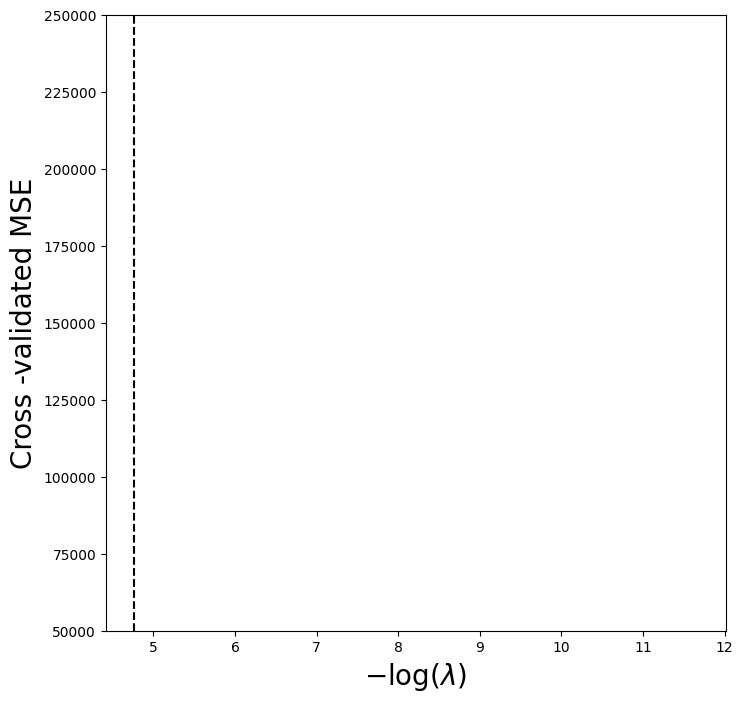

In [ ]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
tuned_ridge.mse_path_.mean(1),
yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [ ]:
np.min(tuned_ridge.mse_path_.mean(1))

0.0002799392048927522

In [ ]:
tuned_ridge.coef_

array([ 1.06005976e-03,  2.48455964e-03, -4.07814058e-04,  4.96340527e-04,
        1.55658684e-04, -1.78608599e-03,  1.87092250e-03,  4.24520778e-04,
        6.34771386e-04, -2.08539870e-03, -1.32758352e-03, -5.04327939e-04,
       -1.16925981e-03,  1.96721909e-04,  3.01465682e-04,  3.06828280e-03,
       -2.76869092e-04, -3.31837003e-04,  3.14156636e-03, -2.83785386e-03,
        9.91663854e-04, -9.02858541e-04, -7.84233611e-05,  1.60976878e-04,
       -1.77680349e-03,  2.16375490e-03,  7.78375013e-04,  9.78998330e-04,
        6.61816868e-04, -3.50338224e-04,  1.23486447e-03,  4.94328857e-04,
       -7.77787036e-04,  1.07343508e-03, -6.61463035e-04, -2.55057748e-04,
        1.28099706e-03,  3.18237655e-04,  1.18451522e-03,  1.99105943e-03,
        7.11947097e-04, -1.65874436e-03, -5.22545682e-05,  1.60579571e-03,
        1.72002669e-04,  2.79458894e-05,  9.41835381e-04, -4.94317097e-04,
       -1.88612181e-04,  9.43428189e-04,  3.37278247e-03, -1.22415692e-03,
        1.90991852e-03,  

In [ ]:
outer_valid = skm.ShuffleSplit(n_splits=1,
test_size=0.25,
random_state=1)
inner_cv = skm.KFold(n_splits=5,
shuffle=True ,
random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas ,
l1_ratio=0,
cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
('ridge', ridgeCV)])
results = skm.cross_validate(pipeCV ,
X,
Y,
cv=outer_valid ,
scoring='neg_mean_squared_error')
-results['test_score']

c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004625241955597918, tolerance: 3.4285946487051483e-06
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mudit.000\OneDrive - University of Essex\Documents\GitHub\Personal-Research-Learning\Personal-Research-Learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: 

array([0.00016402])

In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
l1_ratio=1,
cv=kfold)   
pipeCV = Pipeline(steps=[('scaler', scaler),
('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.0009151088036707827

In [ ]:
lambdas , soln_array = skl.Lasso.path(Xs,
Y,
l1_ratio=1,
n_alphas =100)[:2]
soln_path = pd.DataFrame(soln_array.T,
columns=D.columns ,
index=-np.log(lambdas))

Text(0, 0.5, 'Standardized coefficiients')

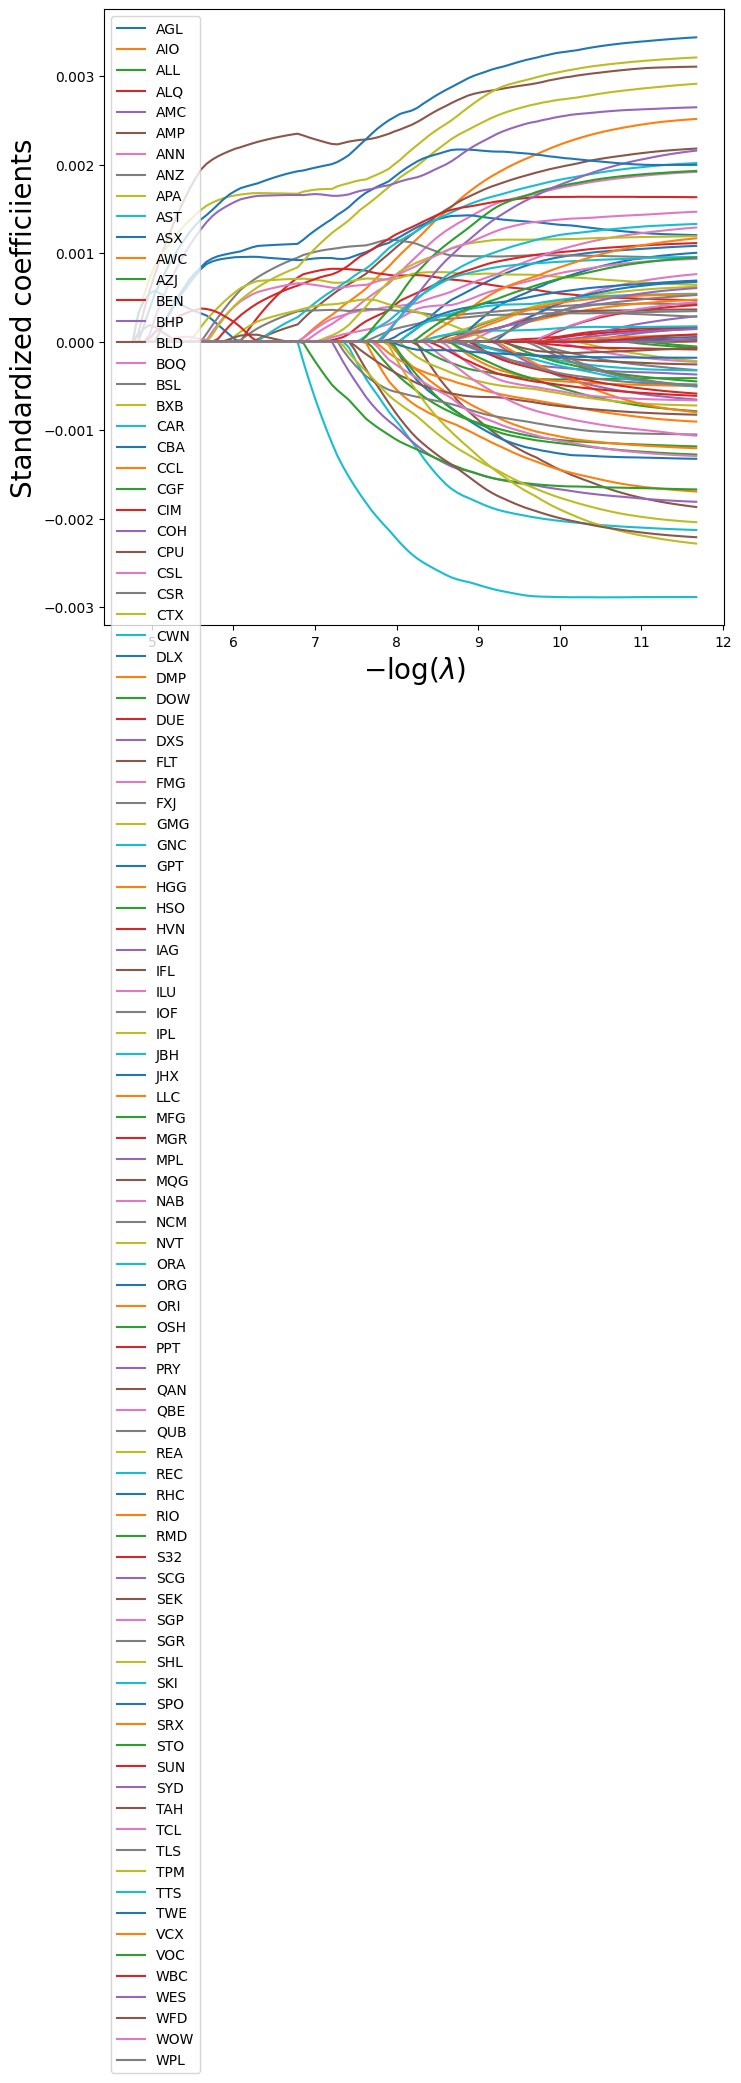

In [ ]:
path_fig , ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
#ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20)

In [ ]:
np.min(tuned_lasso.mse_path_.mean(1))

0.00013348720358094548

Text(0, 0.5, 'Cross -validated MSE')

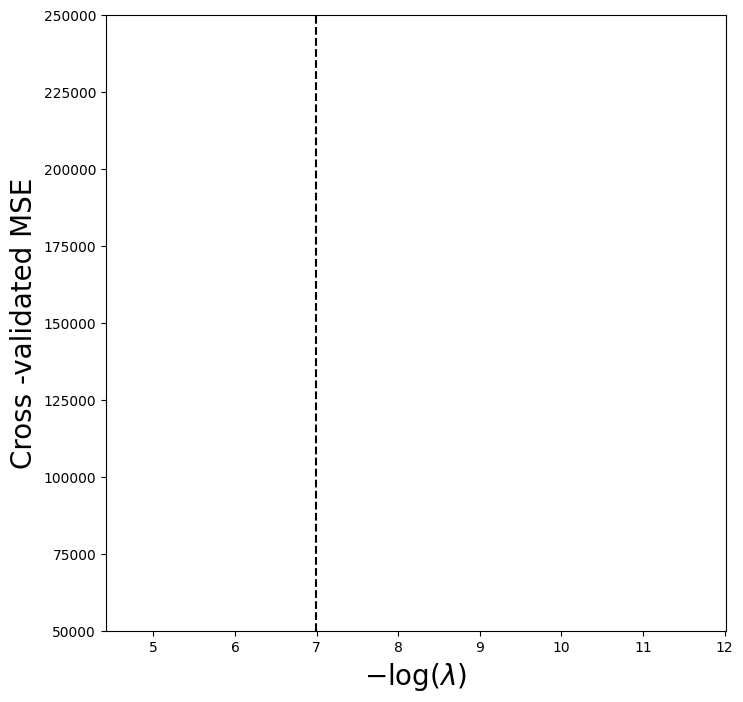

In [ ]:
lassoCV_fig , ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
tuned_lasso.mse_path_.mean(1),
yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim ([50000 ,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross -validated MSE', fontsize=20)

In [ ]:
tuned_lasso.coef_

array([ 0.00000000e+00,  1.60313916e-04, -0.00000000e+00,  7.94019026e-04,
        0.00000000e+00,  0.00000000e+00,  8.07774112e-05,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.28827752e-03,
        0.00000000e+00,  0.00000000e+00,  1.71793021e-03, -6.29882663e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  3.74926916e-04,  0.00000000e+00,  1.01430691e-03,
        7.01864534e-04,  0.00000000e+00,  9.40770086e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.40116812e-04,  3.54337471e-04,  0.00000000e+00,  4.36181020e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  7.07042027e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.02298805e-04,  0.00000000e+00,  1.96518366e-03, -0.00000000e+00,
        0.00000000e+00,  